## Ejemplo: Optimización de la función Rosenbrock $f(\mathbf{x})=(x_0+2z_1-7)^2+(2x_0+x_1-5)^2$ con Descenso de Gradiente

In [3]:
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [114]:

# función Booth (un solo óptimo global, diferenciable)
def booth(X):
    
    return 100*(X[1]-X[0]**2)**2 + (1-X[0])**2
# Derivada de Booth
def dbooth(X):
    x = X[0]
    y = X[1]
    #d f/ d x
    pd1 = 400*x**3 + (2-400*y)*x-2
    
    #d f/ d y
    pd2 = 200*(y-x**2)
    
    return np.array([pd1,pd2])

def hbooth(X):
    
    
    #2da Derivada parcial \partial f/ \partial x^2_1
    #(2*X[0]*2*X[0]**2)+2*X[0]*2*X[1]-2*X[0]*2*11) + 2*(X[0]+X[1]**2-7)*(1)
    #12*X[0]**2+4*X[1]-44+2
    x = X[0]
    y = X[1]
    dx1x1 = 1200*x**2 -400*y+2
    
    #2da Derivada parcial \partial f/ \partial x_1 x_2
    dx1x2 = -400*x
    
    dx2x2 = 200
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    
    M = np.array([[dx1x1,dx1x2],[dx1x2,dx2x2]])
    
    return M


#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapBooth(x,y):

    X = [x,y]
    return booth(X)



In [115]:
#rango
r_min,r_max = -2, 5

#ejes
xaxis = arange(-2, 2, 0.1)
yaxis = arange(-2, 3, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
results = wrapBooth(x, y)

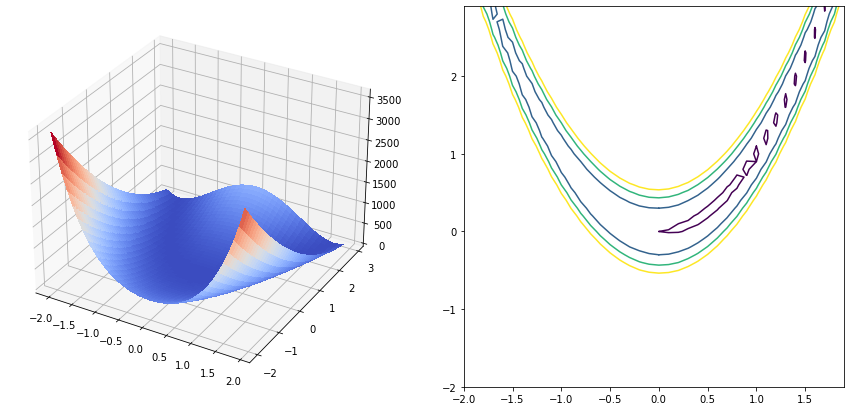

In [116]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, results, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, results,[1,10,20,30])

plt.show()

In [117]:
2*[0]+2*X[1]**2-14

NameError: name 'X' is not defined

In [118]:
g

array([0.35614109, 0.6358946 ])

In [119]:
g.T@g

0.5311984228125164

In [120]:



h = hbooth(X)

e = (g.T@g/(g.T@h@g)).flatten()

e * dbooth(X)

NameError: name 'X' is not defined

In [121]:
#solución inicial x_0

X_0 = np.array([-1.5,2]).T

 

apt = list([])
sol = list([])
G = list([])
GN = list([])

for i in range(100):
    
    apt.append(booth(X_0))
    
    sol.append(list(X_0))

    g = dbooth(X_0)
    
    h = hbooth(X_0)
    
    #si g.T@h@g es positiva podemos hacer
    G.append(g.T@h@g)
    GN.append(g.T@g)
    e = 0.001
    
#    if (g.T@h@g) or True > 0:
    e = g.T@g/(g.T@h@g)
    
    X_0 = X_0 - np.linalg.inv(h)@g
        
#    X_0 = X_0 - (e)*g
    
    # si no, un valor pequeño de epsilon
    #X_0 = X_0 - 0.001*g

    
    

<ipython-input-121-50bd028012d6>:28: RuntimeWarning: invalid value encountered in double_scalars
  e = g.T@g/(g.T@h@g)


In [122]:
GN[7]/G[7]

0.001006611525136916

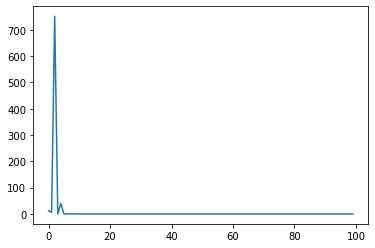

In [123]:
plt.plot(apt)

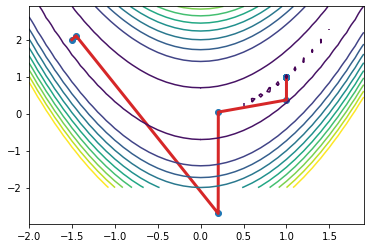

In [124]:
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

In [12]:
X = [-7.5,5]

#e =0.08

aptn = list([])
soln = list([])

for i in range(100):
    aptn.append(booth(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hbooth(X))
    X_next = X - Hinv@np.array(dbooth(X))
    
    X = X_next

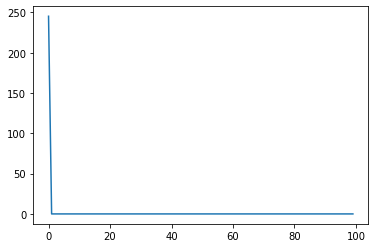

In [13]:
plt.plot(aptn)

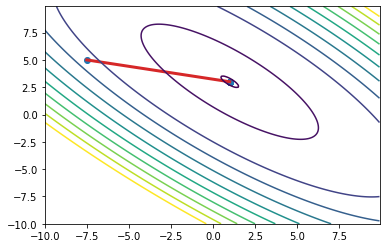

In [28]:
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

https://towardsdatascience.com/optimization-eye-pleasure-78-benchmark-test-functions-for-single-objective-optimization-92e7ed1d1f12